#Install the required packages

In [1]:
!pip install kaggle
!pip install chardet

# Upload File from Localhost

In [ ]:
from google.colab import files
files.upload()

In [4]:
! mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 47.7MB/s]


In [8]:
!unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


#Import the Required libraries

In [9]:

import pandas as pd
import chardet
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Download stopwords

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
with open("/content/spam.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

#Creating dataframe

In [13]:
df = pd.read_csv("/content/spam.csv", encoding=encoding)

In [14]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Dropping unnecessary

In [15]:
df_data=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1)

In [16]:
df_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Rename the Columns for Better understanding

In [17]:
df_data=df_data.rename(columns={"v1":'classification','v2':'Data'})

In [18]:
print(df_data.isna().sum())
print(df_data.duplicated().sum())

classification    0
Data              0
dtype: int64
403


In [19]:
df_data.drop_duplicates(keep='first')

,classification,Data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
df_data.isna().sum()

classification    0
Data              0
dtype: int64

#Using PorterStemmer for Stemming(Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. For example, the stem of the words eating, eats, eaten is eat.)

In [21]:
ps=PorterStemmer()
corpus=[]

for i in range(0,len(df_data)):
  review=re.sub('[^a-zA-Z]', ' ', df_data['Data'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

# Identify the difference between before and after Stemming

In [22]:
print(df_data['Data'][0])
print(corpus[0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
go jurong point crazi avail bugi n great world la e buffet cine got amor wat


BOW:This is one of the most basic and simple methods to convert a list of words to vectors. The idea behind this is a simple, suppose we have a list of words lets say (n) in our corpus. We create a vector of size n and put the value 1 where that word is present and rest all values to 0. This is called one hot encoding as well.

In [23]:
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()

In [24]:
Y=pd.get_dummies(df_data['classification'])
Y=Y.iloc[:,1].values

#Train Test Split

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

#Train model using Naive bayes classifier

In [26]:
spam_detect_model=MultinomialNB()
spam_detect_model.fit(X_train,Y_train)

MultinomialNB()

In [27]:
y_prediction=spam_detect_model.predict(X_test)


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

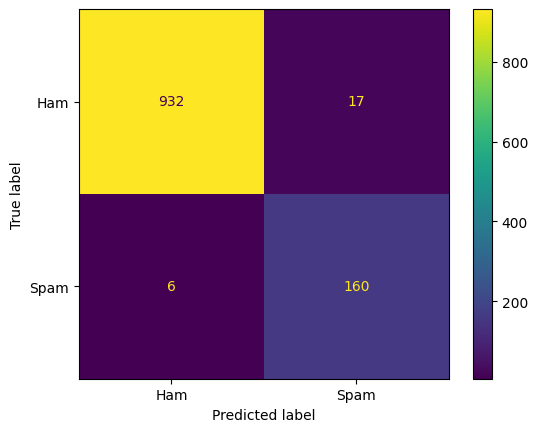

In [29]:
confusion_m=confusion_matrix(Y_test,y_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = ["Ham", "Spam"])
cm_display.plot()
plt.show()

In [31]:
print(classification_report(Y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       949
           1       0.90      0.96      0.93       166

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115

